In [1]:
! pip install sentencepiece

     |████████████████████████████████| 1.2 MB 12.6 MB/s 


In [2]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 12.6 MB/s 
     |████████████████████████████████| 596 kB 54.4 MB/s 
     |████████████████████████████████| 880 kB 57.7 MB/s 
     |████████████████████████████████| 6.6 MB 46.9 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=577d3233732908100aea7e5c44c8b7855cb3cc760300d35f1332e11dec0a4a48
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/NLP_Project/'

Mounted at /content/drive


Reading in the English train and test files 

In [4]:
with open('/content/drive/MyDrive/NLP_Project/English/tweet_by_ID_30_4_2022__04_17_45.txt.text') as f:
    df_list = f.readlines()

In [5]:
import pandas as pd
df_train_english = pd.DataFrame(df_list,
                     columns = ['Tweets']) 

In [6]:
df_train_english.head()

,Tweets
0,Step out and explore. # ️ @ Ellis Island Cafe \n
1,@user @ Cathedral Preparatory School \n
2,RuPaul's Drag Race bingo fun. Drag Queens be S...
3,Black History like a Mufffffaaaaaka #blacchyna...
4,@ BJ's Restaurant and Brewhouse \n


In [7]:
with open('/content/drive/MyDrive/NLP_Project/English/tweet_by_ID_30_4_2022__04_17_45.txt.labels') as f:
    df_test_list = f.readlines()


In [8]:
label_list = []
for each_label in df_test_list:
  label_list.append(int(each_label.replace('\n','')))

In [9]:
df_english_labels = pd.DataFrame(label_list,
                     columns = ['Labels']) 

In [10]:
# Get the lists of sentences and their labels.
train_sentences = df_train_english.Tweets
train_labels = df_english_labels.Labels

In [25]:
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
checkpoint = 'xlm-roberta-base'
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base', do_lower_case=True)

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

In [ ]:
max_len = 0

# For every sentence...
for sent1 in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent1, add_special_tokens=True)
    #print(sent1,sent2)
    #print(input_ids)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  82


In [23]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
import torch
def process_trainingdata(tokenizer,training_set):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  token_type_ids=[]

  # For every sentence...
  for sent1 in training_set:
    encoded_dict = tokenizer(
                        sent1,
                                              # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 140,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])


  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)

  labels = torch.tensor(train_labels)

  # Print sentence 0, now as a list of IDs.
  print('Original: ', train_sentences[0])
  print('Token IDs:', input_ids[0])

  return input_ids,attention_masks,labels

In [ ]:
input_ids_bert,attention_masks_bert,labels_bert = process_trainingdata(tokenizer,train_sentences)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Step out and explore. # ️ @ Ellis Island Cafe 

Token IDs: tensor([    0, 50478,  1810,   136, 88898,     5,   468,     6, 15755,  1374,
          540,  4086, 18481, 53772,     2,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,  

Splitting the train data into train and validation sets 

In [28]:
from torch.utils.data import TensorDataset, random_split

def datasetsize(input_ids, attention_masks, labels):
  dataset = TensorDataset(input_ids, attention_masks, labels)

  train_size = int(0.9 * len(dataset))
  val_size = len(dataset) - train_size

  train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

  print('{:>5,} training samples'.format(train_size))
  print('{:>5,} validation samples'.format(val_size)) 
  return train_dataset,val_dataset

In [ ]:
train_dataset_bert,val_dataset_bert = datasetsize(input_ids_bert,attention_masks_bert,labels_bert)

346,747 training samples
38,528 validation samples


In [31]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
def dataloader(size,train_dataset,val_dataset):
  batch_size = size
 
  train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )
  validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )
  return train_dataloader, validation_dataloader

In [ ]:
train_dataloader_bert, validation_dataloader_bert = dataloader(16,train_dataset_bert,val_dataset_bert)

Initializing the model for XLM Roberta Sequence Classification

In [ ]:
from transformers import AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_roberta = XLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # need to change to the number of label in test for zero-shot performance
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model_roberta.cuda()

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
def optimizer(model):
  optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )
  return optimizer

In [ ]:
optimizer_roberta = optimizer(model_roberta)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 1

def scheduler(train_dataloader,optimizer):
  epochs = 1

  # Total number of training steps is [number of batches] x [number of epochs]. 
  # (Note that this is not the same as the number of training samples).
  total_steps = len(train_dataloader) * epochs

  # Create the learning rate scheduler.
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps) 
  return scheduler

In [ ]:
scheduler_roberta = scheduler(train_dataloader_bert,optimizer_roberta)

Function to help calculate the Accuracy score

In [11]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [12]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

Training the English Tweet dataset

In [ ]:
import random
import numpy as np

def modeltraining(model,train_dataloader,validation_dataloader,optimizer,scheduler):

  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)

  training_stats = []

  total_t0 = time.time()
  epochs = 1

  for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):
        if step % 400 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:        
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        with torch.no_grad():        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

  print("")
  print("Training complete!")

  print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
  return model

In [ ]:
model_roberta = modeltraining(model_roberta,train_dataloader_bert,validation_dataloader_bert,optimizer_roberta,scheduler_roberta)


======== Epoch 1 / 1 ========
Training...
  Batch   400  of  21,672.    Elapsed: 0:01:42.
  Batch   800  of  21,672.    Elapsed: 0:03:24.
  Batch 1,200  of  21,672.    Elapsed: 0:05:06.
  Batch 1,600  of  21,672.    Elapsed: 0:06:48.
  Batch 2,000  of  21,672.    Elapsed: 0:08:29.
  Batch 2,400  of  21,672.    Elapsed: 0:10:11.
  Batch 2,800  of  21,672.    Elapsed: 0:11:53.
  Batch 3,200  of  21,672.    Elapsed: 0:13:35.
  Batch 3,600  of  21,672.    Elapsed: 0:15:17.
  Batch 4,000  of  21,672.    Elapsed: 0:16:59.
  Batch 4,400  of  21,672.    Elapsed: 0:18:41.
  Batch 4,800  of  21,672.    Elapsed: 0:20:23.
  Batch 5,200  of  21,672.    Elapsed: 0:22:04.
  Batch 5,600  of  21,672.    Elapsed: 0:23:46.
  Batch 6,000  of  21,672.    Elapsed: 0:25:28.
  Batch 6,400  of  21,672.    Elapsed: 0:27:10.
  Batch 6,800  of  21,672.    Elapsed: 0:28:52.
  Batch 7,200  of  21,672.    Elapsed: 0:30:34.
  Batch 7,600  of  21,672.    Elapsed: 0:32:16.
  Batch 8,000  of  21,672.    Elapsed: 0:33:5

In [ ]:
torch.save(model_roberta,'/content/drive/MyDrive/NLP_Project/English/xlm_roberta_english.pt')

In [ ]:
#Clear CUDA cache
import gc

gc.collect()

torch.cuda.empty_cache()

Predicting on English test data 

In [14]:

with open(filepath+'English/us_test.text') as f:
    df_test_text_list = f.readlines()


In [15]:
import pandas as pd
df_test_english = pd.DataFrame(df_test_text_list,
                     columns = ['Tweets']) 

In [ ]:
df_test_english.head()

,Tweets
0,en Pelham Parkway\n
1,The calm before...... | w/ sofarsounds @user |...
2,Just witnessed the great solar eclipse @ Tampa...
3,This little lady is 26 weeks pregnant today! E...
4,"Great road trip views! @ Shartlesville, Pennsy..."


In [16]:

with open(filepath+'English/us_test.labels') as f:
    df_test_labels_list = f.readlines()


In [17]:
label_list_test = []
for each_label in df_test_labels_list:
  label_list_test.append(int(each_label.replace('\n','')))

In [18]:
df_english_test_labels = pd.DataFrame(label_list_test,
                     columns = ['Labels']) 

In [ ]:
import pandas as pd
def test_preprocessing(tokenizer, batchsize,maxlength):
  # Load the dataset into a pandas dataframe.

   # Report the number of sentences.
  print('Number of test sentences: {:,}\n'.format(df_test_english.shape[0]))

  test_sentences = df_test_english.Tweets

  test_labels = df_english_test_labels.Labels
  
  input_ids_test = []
  attention_masks_test = []
  
  # For every sentence...
  for sent1 in test_sentences:
    encoded_dict_test = tokenizer.encode_plus(
                        sent1, # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = maxlength,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.    
    input_ids_test.append(encoded_dict_test['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict_test['attention_mask'])

  # Convert the lists into tensors.
  input_ids_test = torch.cat(input_ids_test, dim=0)
  attention_masks_test = torch.cat(attention_masks_test, dim=0)
  #token_type_ids_test = torch.cat(token_type_ids_test, dim=0)
  labels_rte_test = torch.tensor(test_labels)

  # Set the batch size.  
  batch_size = batchsize 

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_rte_test)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  return prediction_dataloader

In [ ]:
prediction_dataloader_english_test = test_preprocessing(tokenizer,16,140)

Number of test sentences: 50,000



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [19]:
def predicttestset(model,prediction_dataloader):
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_eval_accuracy = 0
  act_pred_label = []
  act_true_labels = []

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    logits = result.logits

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    total_eval_accuracy += flat_accuracy(logits, label_ids)
  
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)
    predict_content = logits.argmax(axis=-1).flatten().tolist()
    act_pred_label += predict_content
    #print(act_pred_label)
    act_true_labels += label_ids.flatten().tolist()
  return total_eval_accuracy*100/len(prediction_dataloader), act_pred_label, act_true_labels

Calculating accuracy score for top k emojis

In [20]:
def flat_accuracy_topk(preds, labels, topk):
    count = 0
    labels_flat = labels.flatten()
    for i in range(len(preds)):
      logits = preds[i].argsort()[::-1][:topk]
      # uncomment to print the first value and comment for the accuracy calculation
      if i==1:
        print(logits)
      if labels[i] in logits:
        count += 1
    return count / len(labels_flat)


def predicttestset_topk(model, prediction_dataloader, topk):
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []
  total_eval_accuracy = 0
  total_eval_loss = 0

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
  
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
  
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

    # loss = result.loss
    logits = result.logits
    # total_eval_loss += loss.item()

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    # print(len(logits), len(label_ids))
    total_eval_accuracy += flat_accuracy_topk(logits, label_ids, topk)
    # print(total_eval_accuracy)
    # return
    # Store predictions and true labels
    predictions.append(logits.argmax(axis=-1).flatten().tolist())
    true_labels.append(label_ids)
    # print(len(predictions[0]), len(true_labels[0]))
  total_acc = total_eval_accuracy*100/len(prediction_dataloader)
  # total_loss = total_eval_loss*100/len(prediction_dataloader)
  return total_acc, predictions, true_labels

In [51]:
import torch

model_english = torch.load(filepath+'English/xlm_roberta_english.pt')

In [54]:
acc_ee, pred_label_ee, true_labels_ee = predicttestset(model_english,prediction_dataloader_english_test)

In [ ]:
import pandas as pd
df_ee = pd.DataFrame(list(zip(true_labels_ee, pred_label_ee)),
               columns =['True Labels', 'Prediction'])

In [ ]:
df_ee.to_csv(filepath+'ee.csv')

Retrieving F1 Score and metrics for the English train set on English test set 

In [ ]:
from sklearn.metrics import classification_report
emoji_list_ee = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜']
final_repo = classification_report(true_labels_ee, pred_label_ee, zero_division=1,target_names = emoji_list_ee)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.92      0.84      0.88     10798
           😍       0.31      0.57      0.40      4830
           😂       0.42      0.62      0.50      4534
           💕       0.27      0.28      0.28      2605
           🔥       0.63      0.55      0.59      3716
           😊       0.17      0.20      0.18      1613
           😎       0.25      0.22      0.23      1996
           ✨       0.38      0.36      0.37      2749
           💙       0.29      0.13      0.18      1549
           😘       0.22      0.24      0.23      1175
           📷       0.31      0.69      0.43      1432
          🇺🇸       0.67      0.68      0.67      1949
           ☀       0.75      0.67      0.71      1265
           💜       0.56      0.02      0.03      1114
           😉       0.22      0.07      0.11      1306
           💯       0.38      0.24      0.30      1244
           😁       0.21      0.01      0.02      1153
           🎄       0.68    

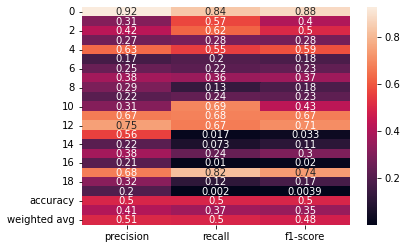

In [ ]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_ee, pred_label_ee, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [ ]:
print('The accuracy for fine-tune english XLMRoberta BERT on English test set is:',acc_ee,'%')

The accuracy for fine-tune english XLMRoberta BERT on English test set is: 49.58 %


Retriving top 3 accuracy for English train set on English test set 

In [ ]:
acc_ee_3, pred_label_ee_3, true_labels_ee_3 = predicttestset_topk(model_english, prediction_dataloader_english_test, 3)

Below shows an example tweet with its predicted emojis 

In [57]:
print(df_test_english.Tweets.values[-1])
print('The top 3 prediction for the above sentence are:',[10, 18,  7], 'and corresponding emojis are:','❤','☀','😍')

Waiting in line for #TheRoom ! #PrepareForDisaster #DisasterArtistSD…

The top 3 prediction for the above sentence are: [10, 18, 7] and corresponding emojis are: ❤ ☀ 😍


In [ ]:
print('The top 3 accuracy for fine-tune english XLMRoberta BERT on English test set is:',acc_ee_3,'%')

The top 3 accuracy for fine-tune english XLMRoberta BERT on English test set is: 70.806 %


Zero shot accuracy on Spanish test set 

In [21]:

df_spanish_test = pd.read_csv(filepath+'Spanish/es_modifiedTestData1.csv')


In [ ]:
df_spanish_test

,Unnamed: 0,Text,Label
0,0,Buenos días desde Valencia en Comunidad Valenc...,6
1,1,"Anoche en la #prefería con @user ,mi prima eva...",2
2,2,"Porfavor llevarlas a reciclar,necesitamos más ...",2
3,3,El vecino roquero que todos queremos tener en ...,2
4,4,Es un placer contar con profesionales del sect...,0
...,...,...,...
9995,9995,@user A TI TE VOY A COMER A BESOS CUANDO TE VE...,9
9996,9996,Esto tiene que ser pecado #tiramisú #muerodeam...,1
9997,9997,"Memories en Villamanrique, Castilla-La Mancha,...",3
9998,9998,"Amor?No se,Pero que bonito se ve todo cuando e...",0


In [29]:
import pandas as pd
def test_preprocessing(tokenizer, batchsize,maxlength):
  # Load the dataset into a pandas dataframe.

   # Report the number of sentences.
  print('Number of test sentences: {:,}\n'.format(df_spanish_test.shape[0]))

  test_sentences = df_spanish_test.Text

  test_labels = df_spanish_test.Label
  
  input_ids_test = []
  attention_masks_test = []
  
  # For every sentence...
  for sent1 in test_sentences:
    encoded_dict_test = tokenizer.encode_plus(
                        sent1, # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = maxlength,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.    
    input_ids_test.append(encoded_dict_test['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict_test['attention_mask'])

  # Convert the lists into tensors.
  input_ids_test = torch.cat(input_ids_test, dim=0)
  attention_masks_test = torch.cat(attention_masks_test, dim=0)
  #token_type_ids_test = torch.cat(token_type_ids_test, dim=0)
  labels_rte_test = torch.tensor(test_labels)

  # Set the batch size.  
  batch_size = batchsize 

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_rte_test)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  return prediction_dataloader

In [32]:
prediction_dataloader_spanish_test = test_preprocessing(tokenizer,16,140)

Number of test sentences: 10,000



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
acc_es, pred_label_es, true_labels_es = predicttestset(model_english,prediction_dataloader_spanish_test)

In [ ]:
import pandas as pd
df_es = pd.DataFrame(list(zip(true_labels_es, pred_label_es)),
               columns =['True Labels', 'Prediction'])

In [ ]:
df_es.to_csv(filepath+'es.csv')

In [ ]:
from sklearn.metrics import classification_report
emoji_list_es = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜','💪', '👌', '🇪🇸', '💞', '🎶', '💘']
final_repo = classification_report(true_labels_es, pred_label_es, zero_division=1,target_names=emoji_list_es)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.96      0.56      0.71      2141
           😍       0.31      0.51      0.38      1408
           😂       0.40      0.73      0.52      1499
           💕       0.11      0.19      0.14       352
           🔥       0.00      1.00      0.00         0
           😊       0.17      0.19      0.18       514
           😎       0.12      0.14      0.13       339
           ✨       0.22      0.27      0.24       416
           💙       0.27      0.06      0.10       413
           😘       0.23      0.25      0.24       397
           📷       0.00      1.00      0.00         0
          🇺🇸       0.00      1.00      0.00         0
           ☀       0.00      1.00      0.00         0
           💜       1.00      0.00      0.00       235
           😉       0.22      0.06      0.09       453
           💯       0.00      1.00      0.00         0
           😁       0.00      0.00      0.00       209
           🎄       0.00    

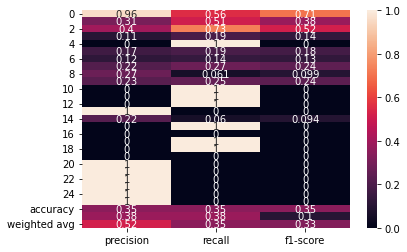

In [ ]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_es, pred_label_es, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [ ]:
print('The zero shot accuracy for fine-tune english XLMRoberta BERT on Spanish test set is:',acc_es,'%')

The zero shot accuracy for fine-tune english XLMRoberta BERT on Spanish test set is: 34.94 %


In [ ]:
acc_es_3, pred_label_es_3, true_labels_es_3 = predicttestset_topk(model_english, prediction_dataloader_spanish_test, 3)

In [ ]:
print(df_spanish_test.Text.values[0])
print('The top 3 prediction for the above sentence are:',[1, 9,  5], 'and corresponding emojis are:','😍','😘','😊')

Buenos días desde Valencia en Comunidad Valenciana, Spain
The top 3 prediction for the above sentence are: [1, 9, 5] and corresponding emojis are: 😍 😘 😊


In [ ]:
print('The top 3 zero shot accuracy for fine-tune english XLMRoberta BERT on Spanish test set is:',acc_es_3,'%')

The top 3 zero shot accuracy for fine-tune english XLMRoberta BERT on Spanish test set is: 52.69 %


Training Spanish Tweets

In [ ]:
df_spanish_train = pd.read_csv("/content/drive/MyDrive/NLP_Project/Spanish/es_modifiedTrainData.csv")


In [ ]:
df_spanish_train

,Unnamed: 0,Text,Label
0,0,Es imposible quererte más @ Plaza Del Callao -...,0
1,1,Disfrutando de buena comida con buena compañía...,5
2,2,Muchísimas Felicidades M!!! Nos vemos pronto! ...,8
3,3,Y pensar que a esta persona la conozco de hace...,8
4,4,¡Que buenas son las noches así y que buena com...,25
...,...,...,...
81160,81160,Cena en Madrid. Plan perfecto para descansar d...,1
81161,81161,Cuando este triste miraré esta batalla de gall...,2
81162,81162,@user cooooomoooo me hueeeeeleeeee a olviiiido...,9
81163,81163,Mi amor @ Bar Concha Velasco Almendralejo,0


In [ ]:
# Get the lists of sentences and their labels.
train_sentences_spanish = df_spanish_train.Text
train_labels_spanish = df_spanish_train.Label

In [ ]:
import torch
def process_trainingdata_spanish(tokenizer,training_set):
  # Tokenize all of the sentences and map the tokens to thier word IDs.
  input_ids = []
  attention_masks = []
  token_type_ids=[]

  # For every sentence...
  for sent1 in training_set:
    encoded_dict = tokenizer(
                        sent1,
                                              # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 140,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])


  # Convert the lists into tensors.
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)

  labels = torch.tensor(train_labels_spanish)

  # Print sentence 0, now as a list of IDs.
  print('Original: ', train_sentences_spanish[0])
  print('Token IDs:', input_ids[0])

  return input_ids,attention_masks,labels

In [ ]:
input_ids_bert_spanish,attention_masks_bert_spanish,labels_bert_spanish = process_trainingdata_spanish(tokenizer,train_sentences_spanish)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Es imposible quererte más @ Plaza Del Callao - Madrid 
Token IDs: tensor([     0,   1184, 110062, 104962,     67,   1005,   1374,  42834,   8901,
         26265,     11,     31,     20,   8884,      2,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,      1,      1,      1,      1,      1,
             1,      1,      1,      1,    

In [ ]:
train_dataset_bert,val_dataset_bert = datasetsize(input_ids_bert_spanish,attention_masks_bert_spanish,labels_bert_spanish)

73,048 training samples
8,117 validation samples


In [ ]:
train_dataloader_bert, validation_dataloader_bert = dataloader(16,train_dataset_bert,val_dataset_bert)

In [ ]:
from transformers import AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_spanish = XLMRobertaForSequenceClassification.from_pretrained(
    "xlm-roberta-base", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 26, # need to change to the number of label in test for zero-shot performance
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model_spanish.cuda()

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

XLMRobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (La

In [ ]:
optimizer_spanish = optimizer(model_spanish)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
scheduler_spanish = scheduler(train_dataloader_bert,optimizer_spanish)

In [ ]:
model_spanish = modeltraining(model_spanish,train_dataloader_bert,validation_dataloader_bert,optimizer_spanish,scheduler_spanish)


======== Epoch 1 / 1 ========
Training...
  Batch   400  of  4,566.    Elapsed: 0:01:42.
  Batch   800  of  4,566.    Elapsed: 0:03:24.
  Batch 1,200  of  4,566.    Elapsed: 0:05:05.
  Batch 1,600  of  4,566.    Elapsed: 0:06:47.
  Batch 2,000  of  4,566.    Elapsed: 0:08:29.
  Batch 2,400  of  4,566.    Elapsed: 0:10:11.
  Batch 2,800  of  4,566.    Elapsed: 0:11:52.
  Batch 3,200  of  4,566.    Elapsed: 0:13:34.
  Batch 3,600  of  4,566.    Elapsed: 0:15:16.
  Batch 4,000  of  4,566.    Elapsed: 0:16:58.
  Batch 4,400  of  4,566.    Elapsed: 0:18:39.

  Average training loss: 2.28
  Training epcoh took: 0:19:22

Running Validation...
  Accuracy: 0.34
  Validation Loss: 2.15
  Validation took: 0:00:34

Training complete!
Total training took 0:19:55 (h:mm:ss)


In [ ]:
torch.save(model_spanish,'/content/drive/MyDrive/NLP_Project/English/xlm_roberta_spanish.pt')

In [24]:
model_spanish = torch.load(filepath+'English/xlm_roberta_spanish.pt')

Testing on Spanish tweets dataset 

In [ ]:
prediction_dataloader_spanish_test = test_preprocessing(tokenizer,16,140)

Number of test sentences: 10,000



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
acc_span_ss, pred_label_ss, true_labels_ss = predicttestset(model_spanish,prediction_dataloader_spanish_test)

In [ ]:
from sklearn.metrics import classification_report
emoji_list_ss = ['❤', '😍', '😂', '💕', '😊', '😎', '✨', '💙', '😘', '💜', '😉', '😁','😜', '💪', '👌', '🇪🇸', '💞', '🎶', '💘']
final_repo = classification_report(true_labels_ss, pred_label_ss, zero_division=1,target_names=emoji_list_ss)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.65      0.72      0.68      2141
           😍       0.28      0.60      0.38      1408
           😂       0.47      0.68      0.56      1499
           💕       0.14      0.01      0.01       352
           😊       0.15      0.18      0.17       514
           😎       0.00      0.00      0.00       339
           ✨       0.29      0.05      0.08       416
           💙       1.00      0.00      0.00       413
           😘       0.27      0.23      0.25       397
           💜       1.00      0.00      0.00       235
           😉       0.18      0.03      0.05       453
           😁       1.00      0.00      0.00       209
           😜       1.00      0.00      0.00       274
           💪       0.29      0.52      0.37       307
           👌       0.04      0.01      0.01       180
          🇪🇸       0.48      0.55      0.51       424
           💞       1.00      0.00      0.00        93
           🎶       0.19    

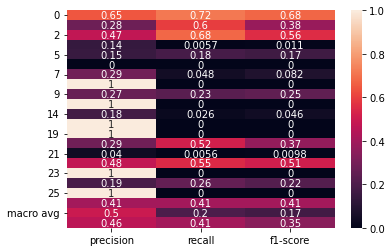

In [ ]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_ss, pred_label_ss, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [ ]:
print('The accuracy for fine-tune Spanish XLMRoberta BERT on Spanish test set is:',acc_span_ss,'%')

The accuracy for fine-tune Spanish XLMRoberta BERT on Spanish test set is: 40.62 %


In [ ]:
acc_es_3, pred_label_es_3, true_labels_es_3 = predicttestset_topk(model_spanish, prediction_dataloader_spanish_test, 3)

In [37]:
print(df_spanish_test.Text.values[0])
print('The top 3 prediction for the above sentence are:',[5, 1, 9], 'and corresponding emojis are:','😊','😍','😘')

Buenos días desde Valencia en Comunidad Valenciana, Spain
The top 3 prediction for the above sentence are: [5, 1, 9] and corresponding emojis are: 😊 😍 😘


In [34]:
print('The top 3 zero shot accuracy for fine-tune spanish XLMRoberta BERT on Spanish test set is:',acc_es_3,'%')

The top 3 zero shot accuracy for fine-tune spanish XLMRoberta BERT on Spanish test set is: 60.43 %


Zero shot accuracy for Spanish XLMRoberta on English test set 

In [38]:
import pandas as pd
def test_preprocessing(tokenizer, batchsize,maxlength):
  # Load the dataset into a pandas dataframe.

   # Report the number of sentences.
  print('Number of test sentences: {:,}\n'.format(df_test_english.shape[0]))

  test_sentences = df_test_english.Tweets

  test_labels = df_english_test_labels.Labels
  
  input_ids_test = []
  attention_masks_test = []
  
  # For every sentence...
  for sent1 in test_sentences:
    encoded_dict_test = tokenizer.encode_plus(
                        sent1, # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = maxlength,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.    
    input_ids_test.append(encoded_dict_test['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks_test.append(encoded_dict_test['attention_mask'])

  # Convert the lists into tensors.
  input_ids_test = torch.cat(input_ids_test, dim=0)
  attention_masks_test = torch.cat(attention_masks_test, dim=0)
  #token_type_ids_test = torch.cat(token_type_ids_test, dim=0)
  labels_rte_test = torch.tensor(test_labels)

  # Set the batch size.  
  batch_size = batchsize 

  # Create the DataLoader.
  prediction_data = TensorDataset(input_ids_test, attention_masks_test, labels_rte_test)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  return prediction_dataloader

In [39]:
prediction_dataloader_english_test = test_preprocessing(tokenizer,16,140)

Number of test sentences: 50,000



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
acc_se, pred_label_se, true_labels_se=predicttestset(model_spanish,prediction_dataloader_english_test)

In [ ]:
from sklearn.metrics import classification_report
emoji_list_se = ['❤', '😍', '😂', '💕', '🔥', '😊', '😎', '✨', '💙', '😘', '📷', '🇺🇸', '☀', '💜', '😉', '💯', '😁', '🎄', '📸', '😜','💪', '👌', '🇪🇸', '🎶']
final_repo = classification_report(true_labels_se, pred_label_se, zero_division=1,target_names=emoji_list_se)
#final_repo = classification_report(true_labels_se, pred_label_se, zero_division=1)
print(final_repo)

              precision    recall  f1-score   support

           ❤       0.61      0.89      0.72     10798
           😍       0.19      0.66      0.29      4830
           😂       0.28      0.52      0.36      4534
           💕       0.18      0.00      0.01      2605
           🔥       1.00      0.00      0.00      3716
           😊       0.09      0.15      0.11      1613
           😎       0.09      0.00      0.00      1996
           ✨       0.30      0.03      0.05      2749
           💙       1.00      0.00      0.00      1549
           😘       0.09      0.06      0.08      1175
           📷       1.00      0.00      0.00      1432
          🇺🇸       1.00      0.00      0.00      1949
           ☀       1.00      0.00      0.00      1265
           💜       1.00      0.00      0.00      1114
           😉       0.06      0.01      0.02      1306
           💯       1.00      0.00      0.00      1244
           😁       1.00      0.00      0.00      1153
           🎄       1.00    

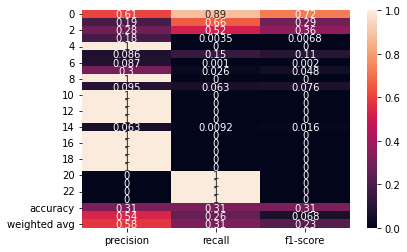

In [ ]:
import pandas as pd
import seaborn as sns
evaluation_report = classification_report(true_labels_se, pred_label_se, output_dict=True, zero_division=1)
sns.heatmap(pd.DataFrame(evaluation_report).iloc[:-1, :].T, annot=True)

In [ ]:
print('The zero shot accuracy for fine-tune Spanish XLMRoberta model on English test set is:',acc_se,'%')

The zero shot accuracy for fine-tune Spanish XLMRoberta model on English test set is: 31.016 %


In [ ]:
acc_es_3, pred_label_es_3, true_labels_es_3 = predicttestset_topk(model_spanish, prediction_dataloader_english_test, 3)

In [49]:
print(df_test_english.Tweets.values[-3])
print('The top 3 prediction for the above sentence are:',[1, 9, 0], 'and corresponding emojis are:','❤','💕','😍')

Pops with Ms Drina at The Swanees Anniversary #ThemRatedRboyz @ The Bell Auditorium

The top 3 prediction for the above sentence are: [1, 9, 0] and corresponding emojis are: ❤ 💕 😍


In [50]:
print('The top 3 zero shot accuracy for fine-tune spanish XLMRoberta BERT on English test set is:',acc_es_3,'%')

The top 3 zero shot accuracy for fine-tune spanish XLMRoberta BERT on English test set is: 42.772 %
